In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customer = pd.read_csv('data/Customer Loyalty History.csv')
df_flight = pd.read_csv('data/Customer Flight Activity.csv')

## Fixing Salary Column

## Salary has 2 issues - NaN/Empty Values and negative salaries

My proposal for a solution for them

1. Empty Values - Get the AVG(Salary) in the same Province and education (Assuming that is the main factors - Gender and marital status doesnt account to salary)
2. Negative - Check count - if its less than 0.5% - remove, else convert the negative to positive sign

In [44]:
df_salary = df_customer[['Province','Salary']]

df_sal_grouped = df_salary.groupby(['Province']).mean().squeeze()

In [45]:
df_customer['Avg_Salary'] = df_customer['Province'].map(df_sal_grouped)

In [46]:
df_customer.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Avg_Salary'],
      dtype='object')

In [48]:
df_customer['Salary'] = df_customer['Salary'].fillna(df_customer['Avg_Salary'])

In [52]:
df_customer['Salary'].isnull().sum()

0

In [51]:
df_customer = df_customer.drop(columns=['Avg_Salary'])

In [57]:
df_customer['Salary'] = df_customer['Salary'].abs()

In [59]:
df_exp = df_customer[['Loyalty Number','Salary']]

In [60]:
df_exp.to_csv('data\Salary.csv',index=False)

## Location(Province) Distribution

In [63]:
df_customer['Province'].value_counts(normalize=True)*100

Province
Ontario                 32.287746
British Columbia        26.342833
Quebec                  19.716795
Alberta                  5.789568
Manitoba                 3.931409
New Brunswick            3.799964
Nova Scotia              3.094939
Saskatchewan             2.443688
Newfoundland             1.541495
Yukon                    0.657227
Prince Edward Island     0.394336
Name: proportion, dtype: float64

### Correlation between Flights Booked, Solo flights and points accumulated

In [64]:
df_corr = df_flight[['Flights Booked','Total Flights','Points Accumulated']]

<AxesSubplot: >

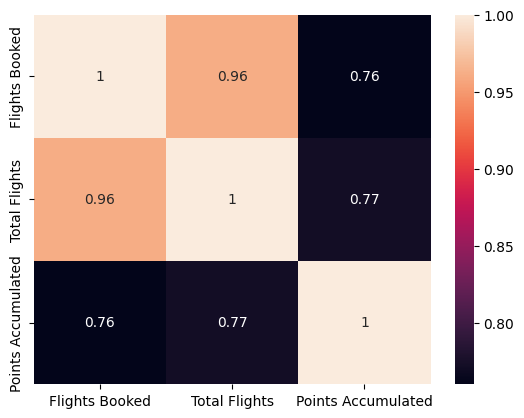

In [66]:
corr_matrix = df_corr.corr()

sns.heatmap(corr_matrix,annot=True)

In [68]:
df_flight['Total Flights'].shape

(405624,)

<AxesSubplot: xlabel='Total Flights', ylabel='Points Accumulated'>

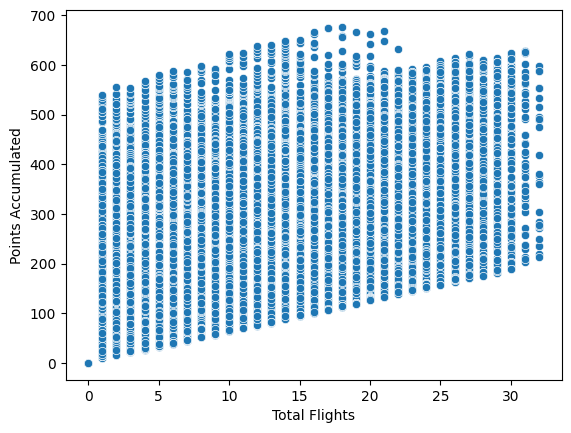

In [69]:
sns.scatterplot(df_flight,x='Total Flights',y='Points Accumulated')